In [20]:
import xarray as xr 
import glob 
import matplotlib.pyplot as plt 
import numpy as np

import sys
sys.path.append('/home/users/cturrell/documents/eddy_feedback/')
import functions.data_wrangling as data 
import functions.plotting as plot
import functions.eddy_feedback as ef

# AWI-CM-1-1-MR

Correlation calculated.
Correlation calculated.
NH EFP: 0.2926 
SH EFP: 0.2957


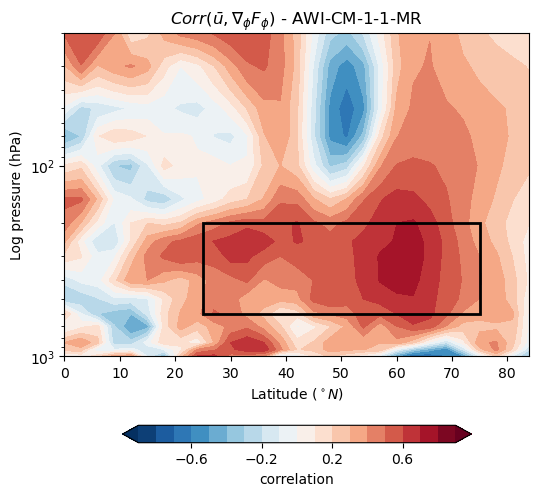

In [21]:
awi = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_AWI.nc')
awi = awi.convert_calendar('noleap')
awi = awi.sel(lat=slice(-84,84))

efp_awi_north = ef.calculate_efp_pamip(awi)
efp_awi_south = ef.calculate_efp_pamip(awi, calc_south_hemis=True)
print(f'NH EFP: {efp_awi_north} \nSH EFP: {efp_awi_south}')

plot.plot_pamip_correlation(awi, take_seasonal=False, cut_poles=84, label='AWI-CM-1-1-MR')

In [39]:
awi

<xarray.Dataset>
Dimensions:  (ens_ax: 100, level: 19, lat: 57)
Coordinates:
  * level    (level) float64 1e+03 925.0 850.0 700.0 600.0 ... 20.0 10.0 5.0 1.0
  * lat      (lat) int64 -84 -81 -78 -75 -72 -69 -66 ... 66 69 72 75 78 81 84
Dimensions without coordinates: ens_ax
Data variables:
    ubar     (ens_ax, level, lat) float32 dask.array<chunksize=(100, 19, 57), meta=np.ndarray>
    div1     (ens_ax, level, lat) float64 dask.array<chunksize=(100, 19, 57), meta=np.ndarray>

ubar NaNs: False
div1 NaNs: False




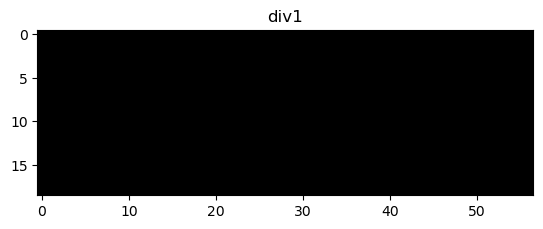

In [22]:
print(f'ubar NaNs: {np.any(np.isnan(awi.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(awi.div1.values))}')
print('\n')

# take DJF mean
awi = data.seasonal_dataset(awi)
awi = awi.mean('time')

# find NaNs
is_nan_awi = np.isnan(awi.div1)
is_nan_awi = is_nan_awi.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_awi.values, cmap='gray')
plt.title('div1')
plt.show()

# CanESM5

Correlation calculated.
Correlation calculated.
NH EFP: 0.3445 
SH EFP: 0.3323


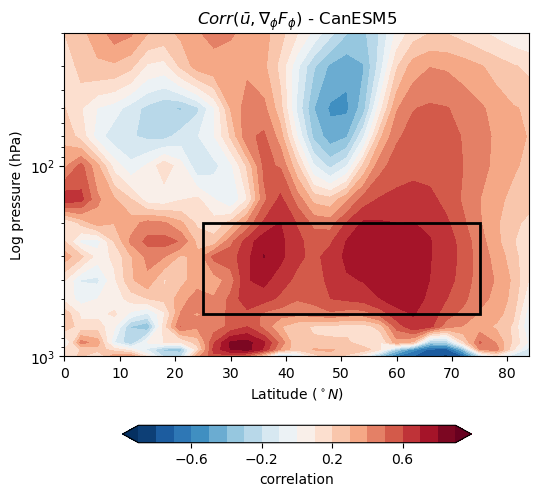

In [23]:
can = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_CanESM5.nc')
can = can.sel(lat=slice(-84,84))

efp_can_north = ef.calculate_efp_pamip(can)
efp_can_south = ef.calculate_efp_pamip(can, calc_south_hemis=True)
print(f'NH EFP: {efp_can_north} \nSH EFP: {efp_can_south}')

plot.plot_pamip_correlation(can, take_seasonal=False, cut_poles=84, label='CanESM5')

ubar NaNs: False
div1 NaNs: False




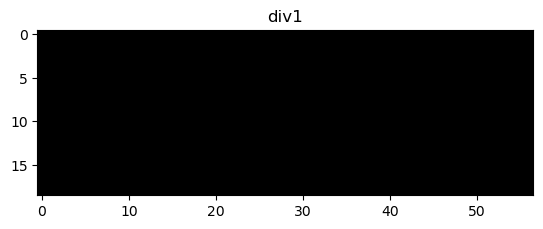

In [24]:
print(f'ubar NaNs: {np.any(np.isnan(can.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(can.div1.values))}')
print('\n')

# take DJF mean
can = data.seasonal_dataset(can)
can = can.mean('time')

# find NaNs
is_nan_can = np.isnan(can.div1)
is_nan_can = is_nan_can.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_can.values, cmap='gray')
plt.title('div1')
plt.show()

# CNRM-CM6-1

Correlation calculated.
Correlation calculated.
NH EFP: 0.2717 
SH EFP: 0.2231


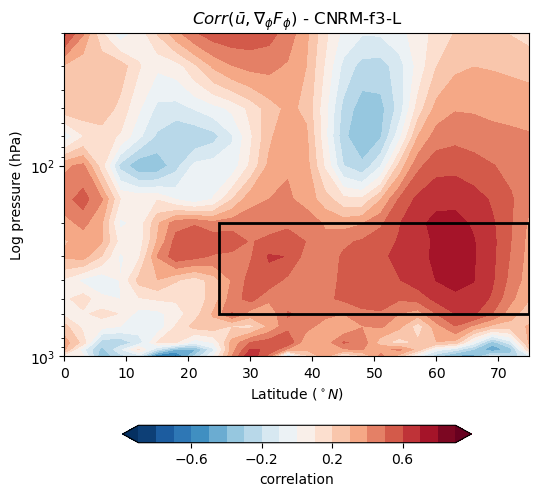

In [25]:
cnrm = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_CNRM.nc')
cnrm = cnrm.sel(lat=slice(-75,75))

efp_cnrm_north = ef.calculate_efp_pamip(cnrm)
efp_cnrm_south = ef.calculate_efp_pamip(cnrm, calc_south_hemis=True)
print(f'NH EFP: {efp_cnrm_north} \nSH EFP: {efp_cnrm_south}')

plot.plot_pamip_correlation(cnrm, take_seasonal=False, cut_poles=84, label='CNRM-f3-L')

ubar NaNs: False
div1 NaNs: True




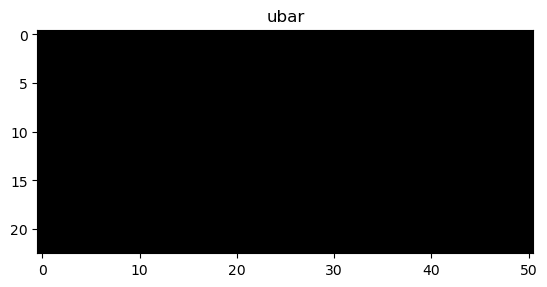

In [26]:
# take DJF mean
cnrm = data.seasonal_dataset(cnrm)
cnrm = cnrm.mean('time')

print(f'ubar NaNs: {np.any(np.isnan(cnrm.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(cnrm.div1.values))}')
print('\n')

# find NaNs
is_nan_cnrm = np.isnan(cnrm.ubar)
is_nan_cnrm = is_nan_cnrm.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_cnrm.values, cmap='gray')
plt.title('ubar')
plt.show()

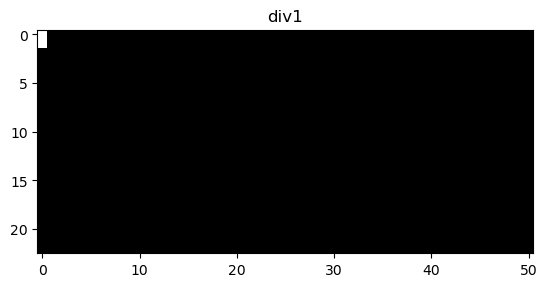

In [27]:
# find NaNs
is_nan_cnrm = np.isnan(cnrm.div1)
is_nan_cnrm = is_nan_cnrm.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_cnrm.values, cmap='gray')
plt.title('div1')
plt.show()

# FGOALS-f3-L

ubar NaNs: False
div1 NaNs: False


Correlation calculated.
Correlation calculated.
NH EFP: 0.2754 
SH EFP: 0.1539


/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


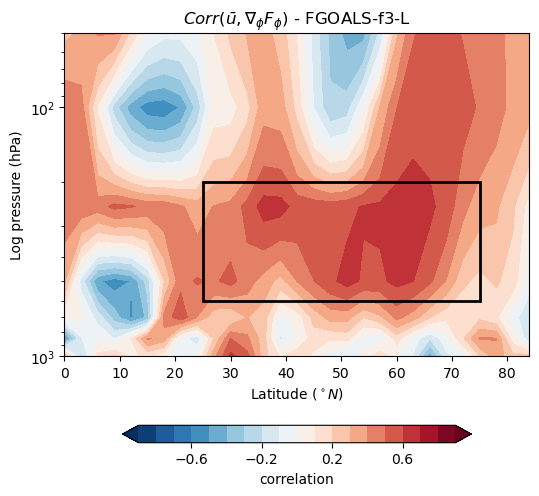

In [28]:
fgoals = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_FGOALS.nc')
fgoals = fgoals.sel(lat=slice(-84,84))

print(f'ubar NaNs: {np.any(np.isnan(fgoals.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(fgoals.div1.values))}')
print('\n')

efp_fgoals_north = ef.calculate_efp_pamip(fgoals)
efp_fgoals_south = ef.calculate_efp_pamip(fgoals, calc_south_hemis=True)
print(f'NH EFP: {efp_fgoals_north} \nSH EFP: {efp_fgoals_south}')

plot.plot_pamip_correlation(fgoals, take_seasonal=False, cut_poles=84, label='FGOALS-f3-L')

ubar NaNs: False
div1 NaNs: False




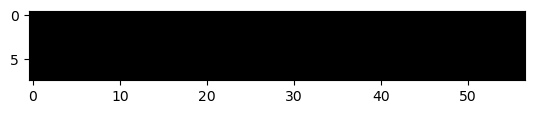

In [29]:
# take DJF mean
fgoals = data.seasonal_dataset(fgoals)
fgoals = fgoals.mean('time')

print(f'ubar NaNs: {np.any(np.isnan(fgoals.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(fgoals.div1.values))}')
print('\n')

# find NaNs
is_nan_fgoals = np.isnan(fgoals.div1)
is_nan_fgoals = is_nan_fgoals.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_fgoals.values, cmap='gray')
plt.show()

# HadGEM3-GC31-MM

Correlation calculated.
Correlation calculated.
NH EFP: 0.1866 
SH EFP: 0.1974


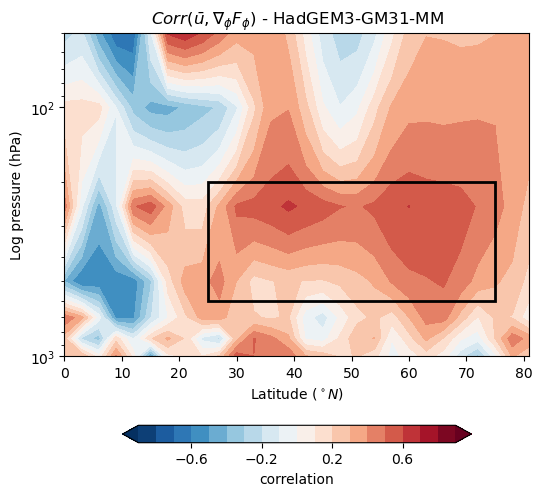

In [30]:
had = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_HadGEM.nc')
had = had.sel(lat=slice(-81,81))

efp_had_north = ef.calculate_efp_pamip(had)
efp_had_south = ef.calculate_efp_pamip(had, calc_south_hemis=True)
print(f'NH EFP: {efp_had_north} \nSH EFP: {efp_had_south}')

plot.plot_pamip_correlation(had, take_seasonal=False, cut_poles=84, label='HadGEM3-GM31-MM')

ubar NaNs: True
div1 NaNs: True




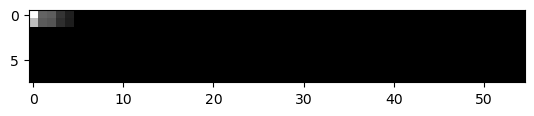

In [31]:
# take DJF mean
had = data.seasonal_dataset(had)
had = had.mean('time')

print(f'ubar NaNs: {np.any(np.isnan(had.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(had.div1.values))}')
print('\n')

# find NaNs
is_nan_had = np.isnan(had.div1)
is_nan_had = is_nan_had.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_had.values, cmap='gray')
plt.show()

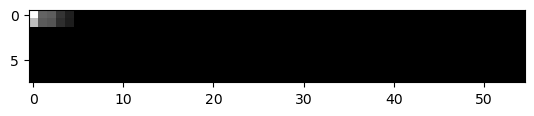

In [32]:
# find NaNs
is_nan_had = np.isnan(had.div1)
is_nan_had = is_nan_had.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_had.values, cmap='gray')
plt.show()

# IPSL-CM6A-LR

Correlation calculated.
Correlation calculated.
NH EFP: 0.3102 
SH EFP: 0.2274


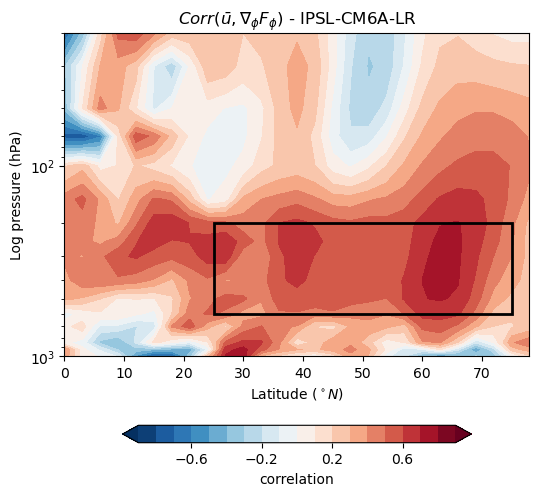

In [33]:
ipsl = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_IPSL.nc')
ipsl = ipsl.sel(lat=slice(-78,78))

efp_ipsl_north = ef.calculate_efp_pamip(ipsl)
efp_ipsl_south = ef.calculate_efp_pamip(ipsl, calc_south_hemis=True)
print(f'NH EFP: {efp_ipsl_north} \nSH EFP: {efp_ipsl_south}')

plot.plot_pamip_correlation(ipsl, take_seasonal=False, cut_poles=84, label='IPSL-CM6A-LR')

ubar NaNs: False
div1 NaNs: False




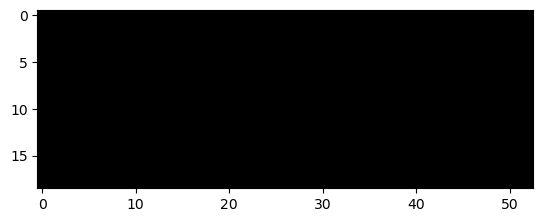

In [34]:
# take DJF mean
ipsl = data.seasonal_dataset(ipsl)
ipsl = ipsl.mean('time')

print(f'ubar NaNs: {np.any(np.isnan(ipsl.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(ipsl.div1.values))}')
print('\n')

# find NaNs
is_nan_ipsl = np.isnan(ipsl.ubar)
is_nan_ipsl = is_nan_ipsl.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_ipsl.values, cmap='gray')
plt.show()

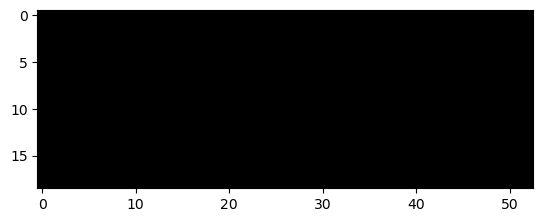

In [35]:
# find NaNs
is_nan_ipsl = np.isnan(ipsl.div1)
is_nan_ipsl = is_nan_ipsl.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_ipsl.values, cmap='gray')
plt.show()

# MIRCO6

Correlation calculated.


/home/users/cturrell/miniforge3/envs/eddy/lib/python3.12/site-packages/dask/array/numpy_compat.py:51: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)


Correlation calculated.
NH EFP: 0.1896 
SH EFP: 0.222


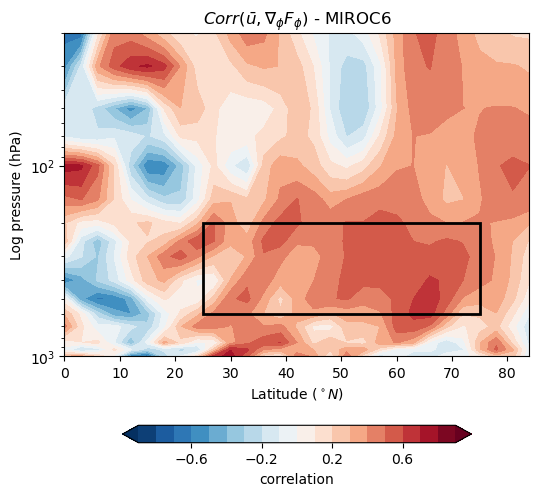

In [36]:
miroc = xr.open_mfdataset('/gws/nopw/j04/arctic_connect/cturrell/PAMIP_data/regridded/pdSST-pdSIC_3x3/3x3_ef_MIROC.nc')

efp_miroc_north = ef.calculate_efp_pamip(miroc)
efp_miroc_south = ef.calculate_efp_pamip(miroc, calc_south_hemis=True)
print(f'NH EFP: {efp_miroc_north} \nSH EFP: {efp_miroc_south}')

plot.plot_pamip_correlation(miroc, take_seasonal=False, cut_poles=84, label='MIROC6')

ubar NaNs: True
div1 NaNs: True




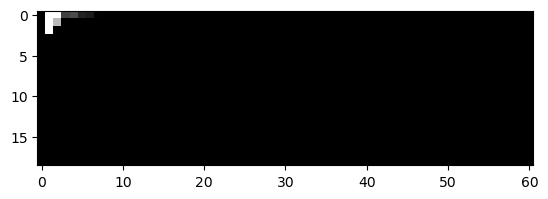

In [37]:
print(f'ubar NaNs: {np.any(np.isnan(miroc.ubar.values))}')
print(f'div1 NaNs: {np.any(np.isnan(miroc.div1.values))}')
print('\n')

# take DJF mean
miroc = data.seasonal_dataset(miroc)
miroc = miroc.mean('time')

# find NaNs
is_nan_miroc = np.isnan(miroc.ubar)
is_nan_miroc = is_nan_miroc.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_miroc.values, cmap='gray')

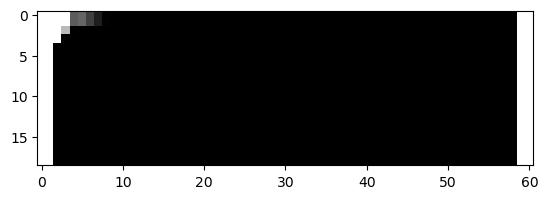

In [38]:
# find NaNs
is_nan_miroc = np.isnan(miroc.div1)
is_nan_miroc = is_nan_miroc.mean('ens_ax')

# plot missing values
plt.imshow(is_nan_miroc.values, cmap='gray')
plt.show()